In [45]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
import math

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from env import get_db_url
import os
from itertools import combinations
# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format
from sklearn.model_selection import train_test_split
import wrangle_zillow as wrangle
import utilities
from sklearn.cluster import KMeans

In [2]:
df = wrangle.wrangle_zillow()

In [3]:
df.shape

(46477, 22)

In [4]:
46477/52242

0.8896481757972513

In [5]:
df.taxvaluedollarcnt.min()

50043

In [6]:
df.logerror.max()

0.2998901899839999

In [7]:
train, validate, test = wrangle.split_zillow_data(df)

In [8]:
train.shape, validate.shape, test.shape

((26026, 22), (11155, 22), (9296, 22))

# Exploration

 ### Ask at least 5 questions about the data, keeping in mind that your target variable is logerror.
-  Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?
- is there a relationship between log error and age
- log error and fips
- log error and square feet 
- log error and transaction date

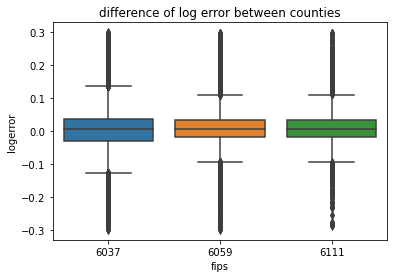

In [9]:
sns.boxplot(train.fips, train.logerror)
plt.title('difference of log error between counties')
plt.show()

In [10]:
train.groupby('fips', as_index=False)['logerror'].mean()

,fips,logerror
0,6037,0.01
1,6059,0.01
2,6111,0.01


the average log error doesn't seem to be much different between the different counties, but LA county does seem to have a bit wider average distribution than the other two counties

In [11]:
df.isna().sum()

propertylandusetypeid           0
bathroomcnt                     0
bedroomcnt                      0
calculatedfinishedsquarefeet    0
fips                            0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertycountylandusecode       0
regionidcity                    0
regionidzip                     0
yearbuilt                       0
taxvaluedollarcnt               0
taxamount                       0
censustractandblock             0
propertylandusedesc             0
id.1                            0
logerror                        0
transactiondate                 0
age                             0
month                           0
county                          0
dtype: int64

In [12]:
df.shape

(46477, 22)

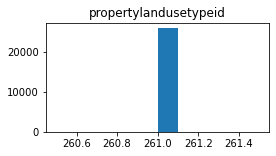

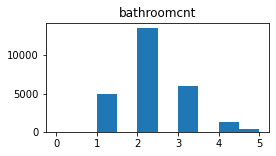

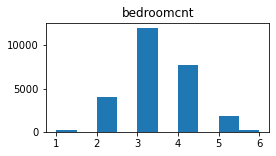

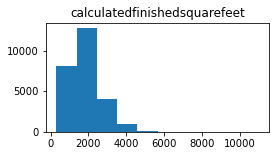

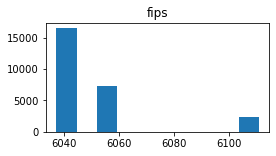

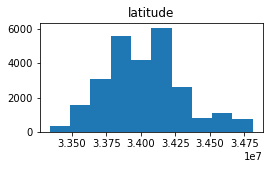

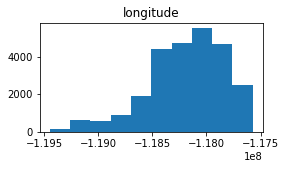

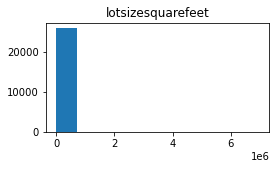

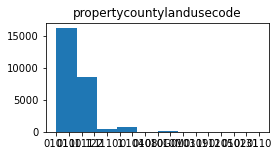

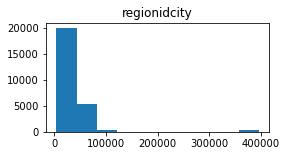

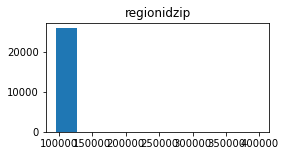

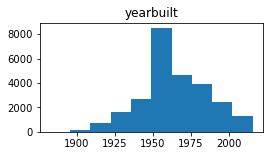

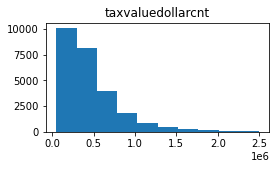

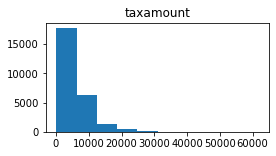

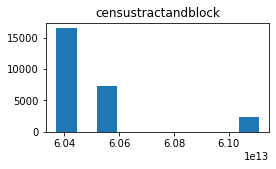

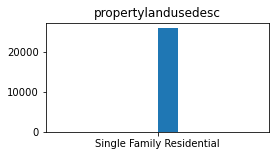

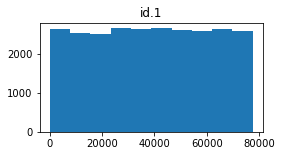

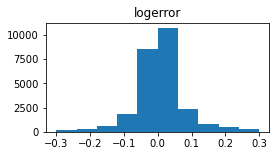

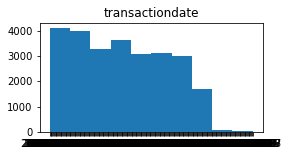

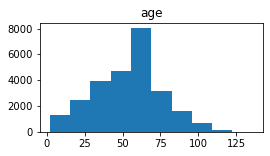

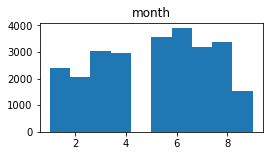

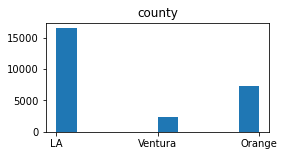

In [13]:
utilities.variable_dist()

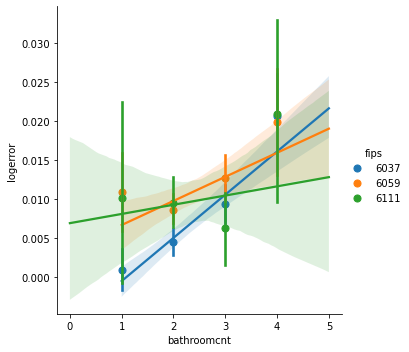

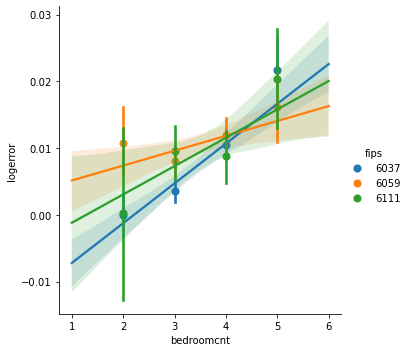

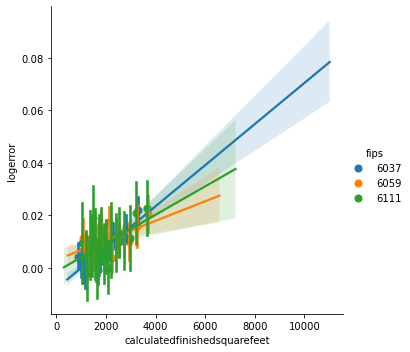

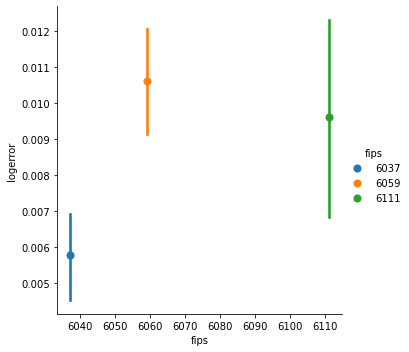

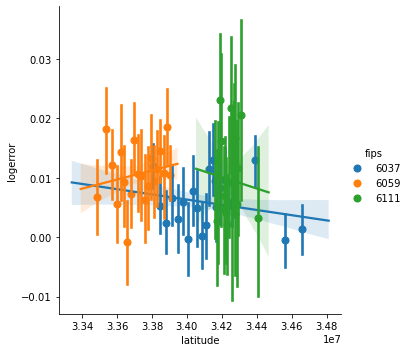

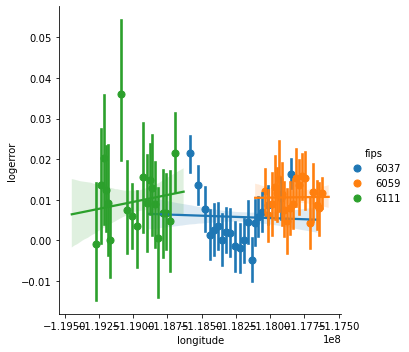

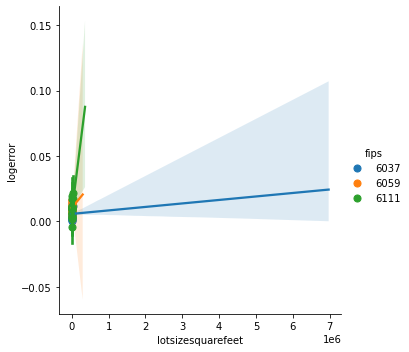

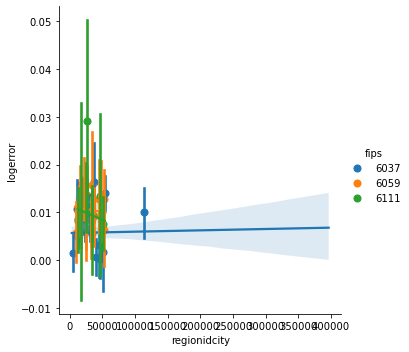

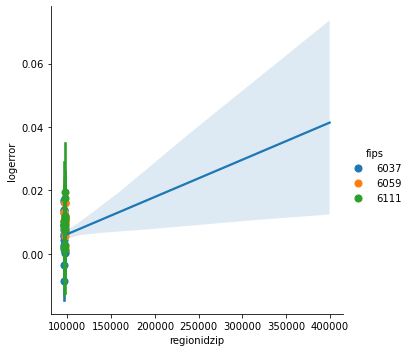

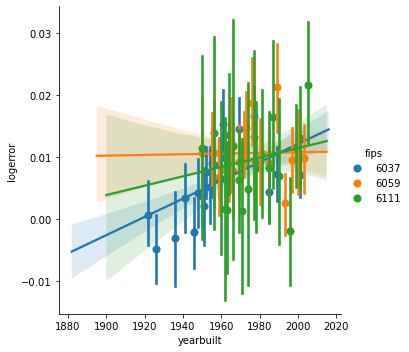

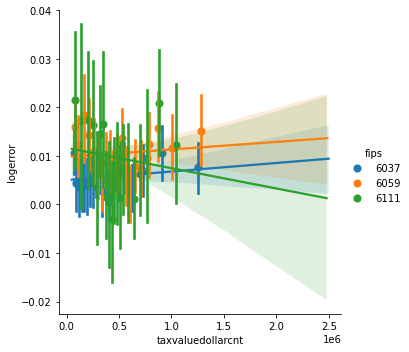

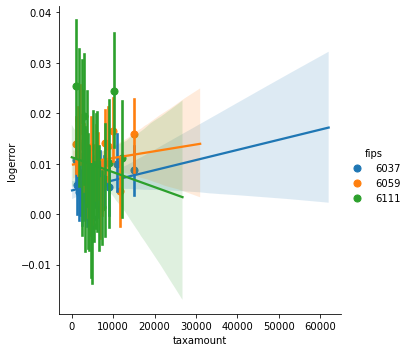

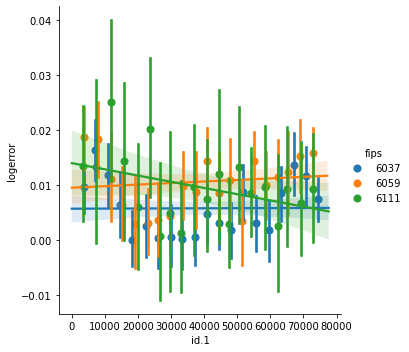

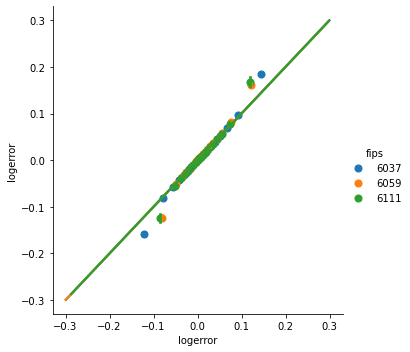

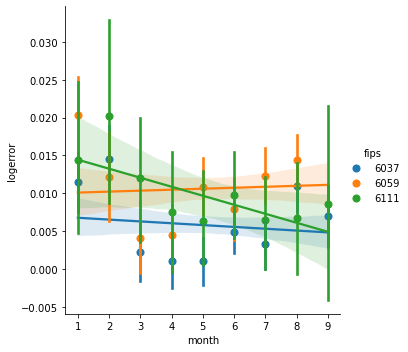

In [14]:
utilities.plot_variable_pairs()

In [15]:
df.dtypes

propertylandusetypeid             int64
bathroomcnt                       int64
bedroomcnt                        int64
calculatedfinishedsquarefeet      int64
fips                              int64
latitude                          int64
longitude                         int64
lotsizesquarefeet                 int64
propertycountylandusecode        object
regionidcity                      int64
regionidzip                       int64
yearbuilt                         int64
taxvaluedollarcnt                 int64
taxamount                         int64
censustractandblock               int64
propertylandusedesc              object
id.1                              int64
logerror                        float64
transactiondate                  object
age                               int64
month                             int64
county                           object
dtype: object

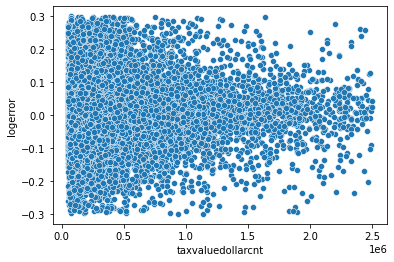

In [16]:
sns.scatterplot(x=train.taxvaluedollarcnt, y = train.logerror)
plt.show()

In [17]:
df.logerror.min()

-0.299543956101

In [18]:
df.logerror.max()

0.2998901899839999

<AxesSubplot:xlabel='month', ylabel='logerror'>

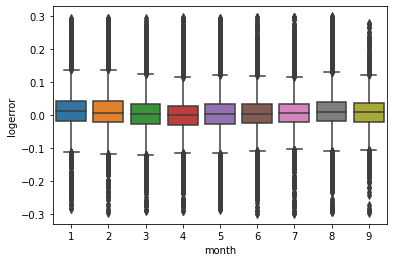

In [19]:
sns.boxplot(x=train.month, y = train.logerror)

<AxesSubplot:xlabel='age', ylabel='Count'>

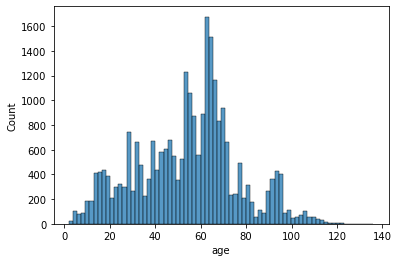

In [20]:
sns.histplot(data = train, x = 'age')

<AxesSubplot:xlabel='age', ylabel='logerror'>

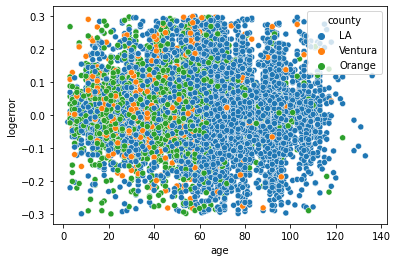

In [21]:
sns.scatterplot(data = train, x = 'age', y = 'logerror', hue = 'county')

In [22]:
columns= ['county' , 'transactiondate' , 'propertylandusetypeid', 'propertycountylandusecode', 'regionidcity', 'regionidzip', 'yearbuilt', 'taxamount', 'cencustractandblock', 'propertylandusedesc', 'id.1']

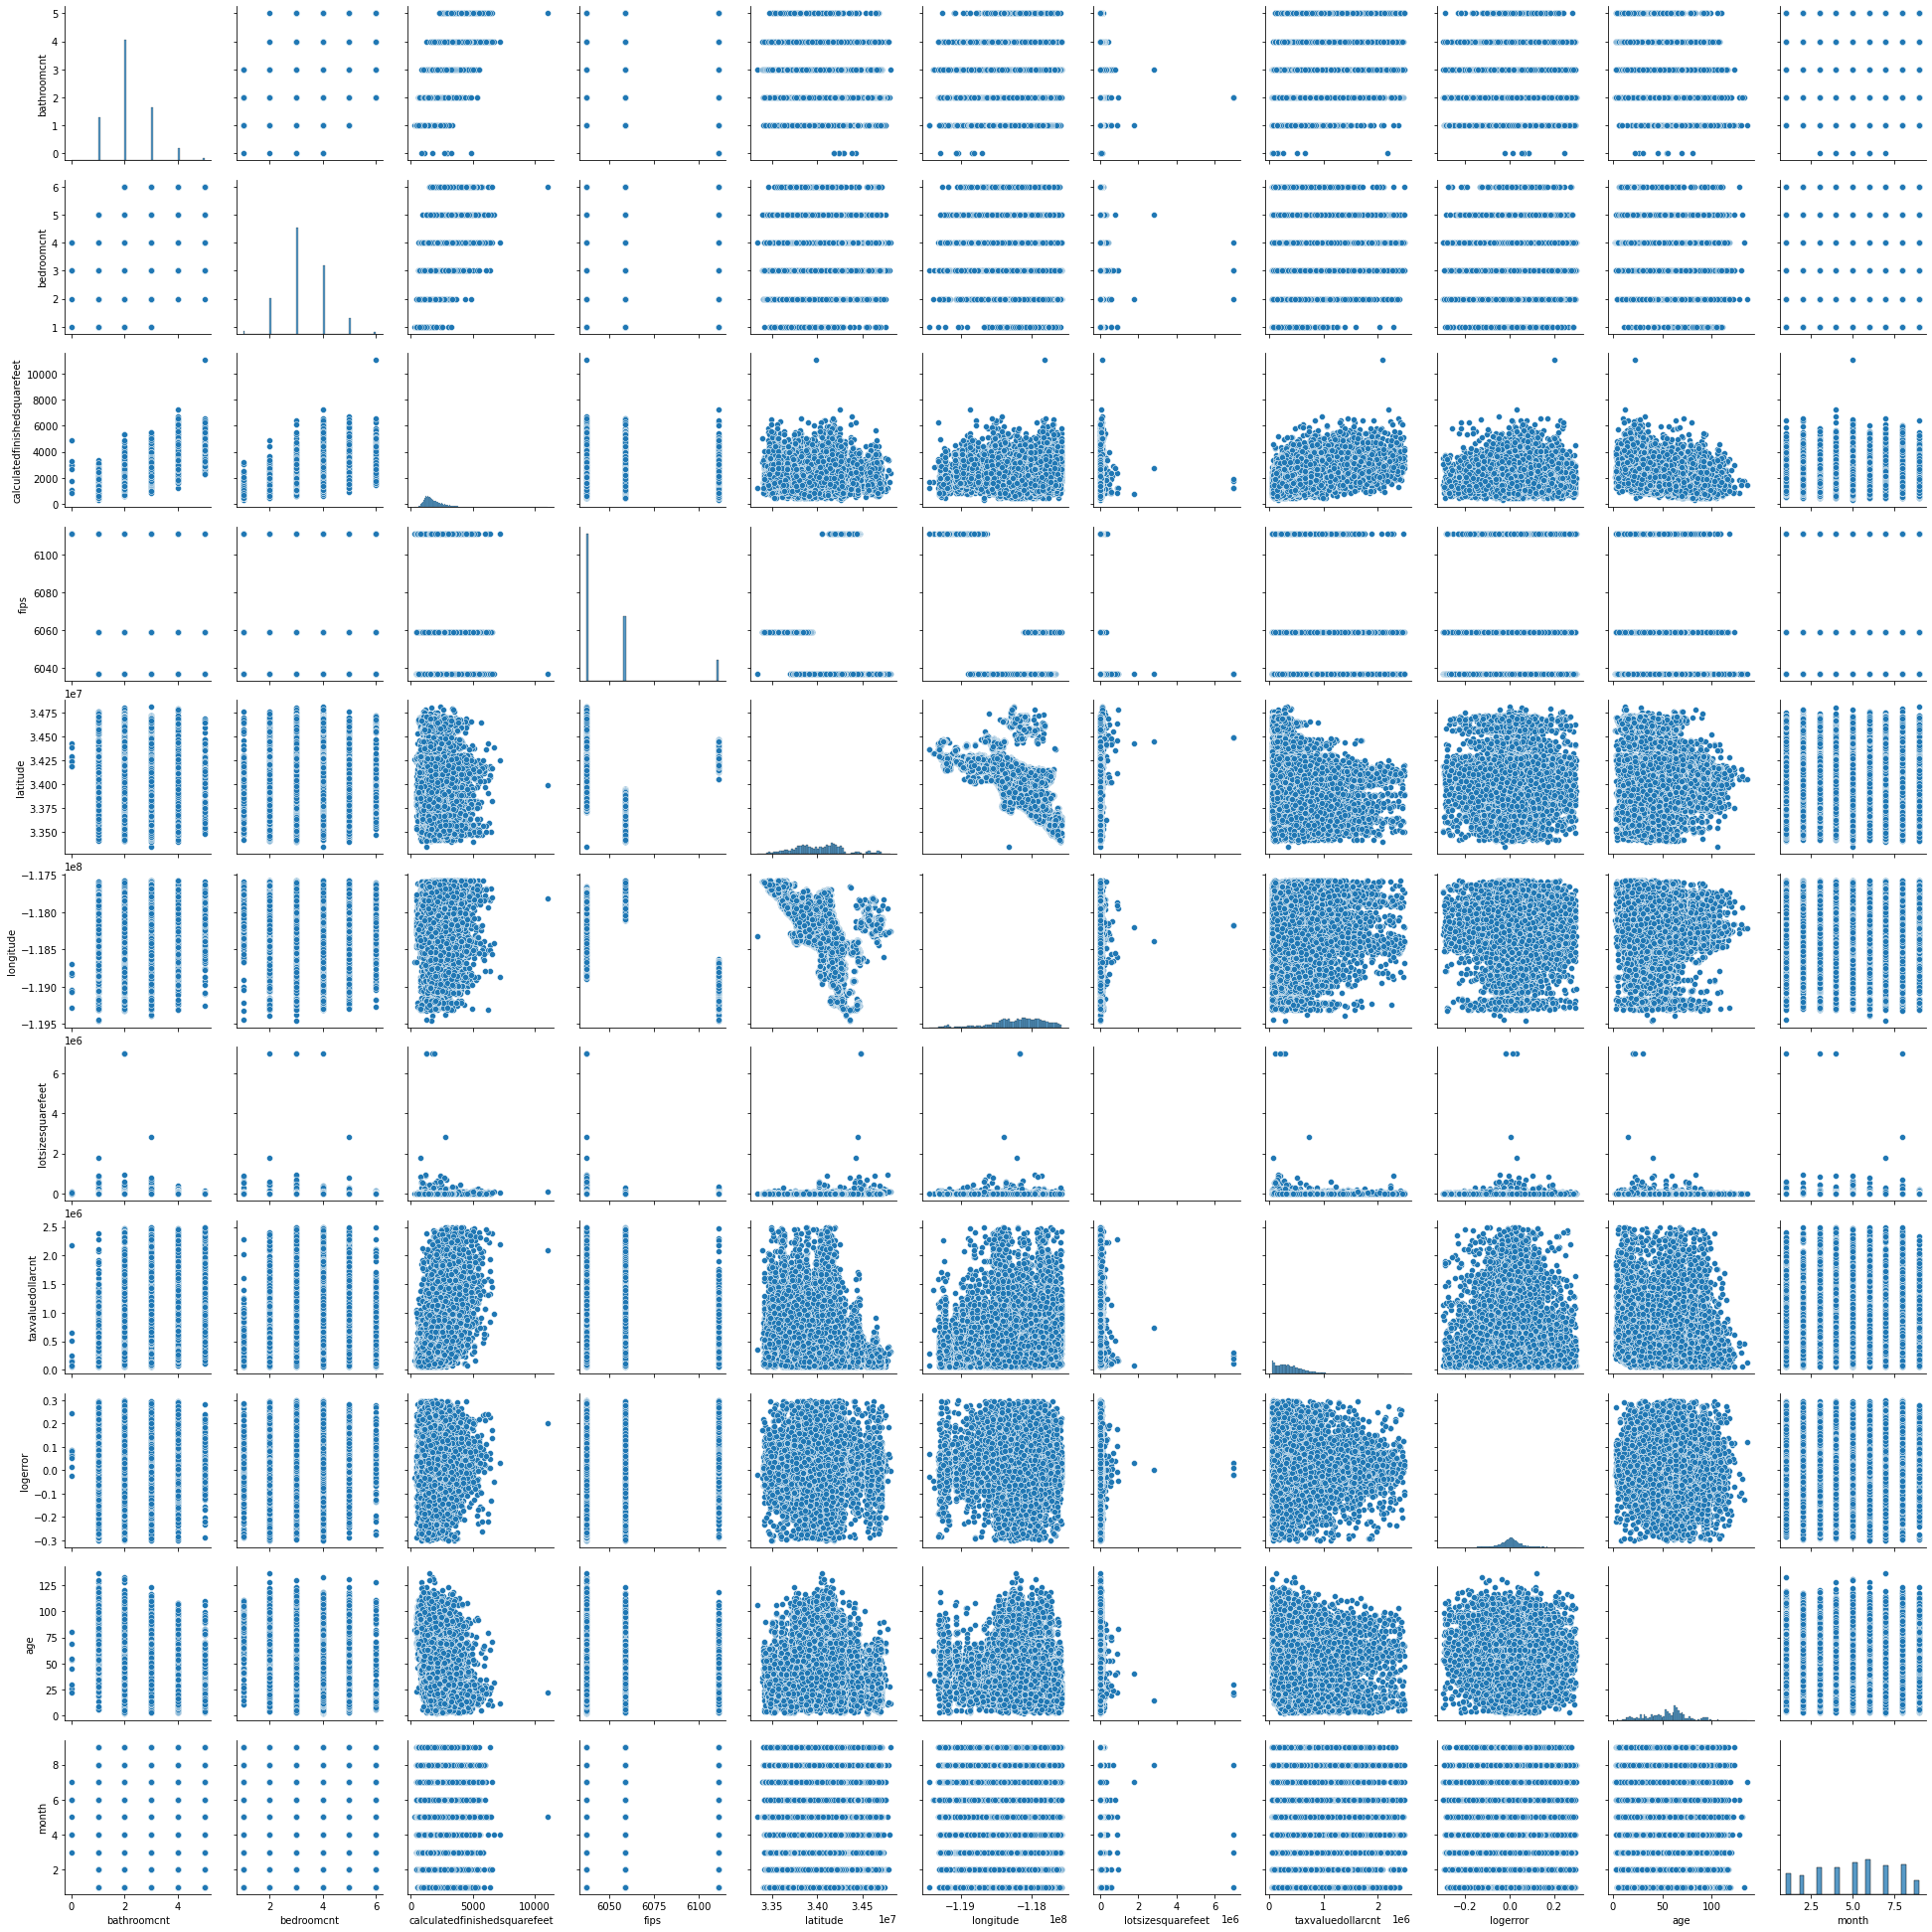

In [23]:
sns.pairplot(train.drop(columns= ['county' , 'transactiondate' , 'propertylandusetypeid', 'propertycountylandusecode', 'regionidcity', 'regionidzip', 'yearbuilt', 'taxamount', 'censustractandblock', 'propertylandusedesc', 'id.1']))

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

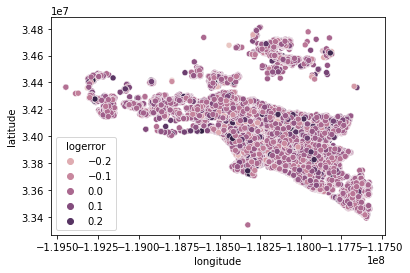

In [24]:
sns.scatterplot(data=train, x = 'longitude', y = 'latitude', hue = 'logerror')

In [25]:
def corr_plot(df):
    """
    Takes in a dataframe and returns a correlation plot of all of the numeric variables
    """
    all_features = df.columns.to_list()
    plotted_features = []
    for feature in all_features:
        if df[feature].dtype != 'object':
            plotted_features.append(feature)
    corr = df[plotted_features].corr()
    plt.rc('font',size=11)
    plt.rc('figure', figsize=(13,7))
    sns.heatmap(corr, cmap='Blues', annot=True)
    

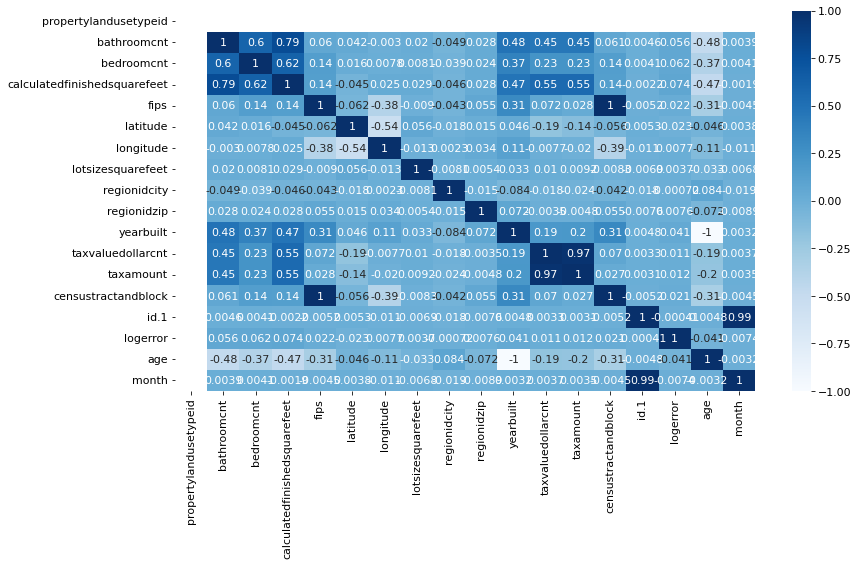

In [26]:
corr_plot(train)

In [27]:
columns_corr = train.corr()
columns_corr.logerror

propertylandusetypeid                           NaN
bathroomcnt                                    0.06
bedroomcnt                                     0.06
calculatedfinishedsquarefeet                   0.07
fips                                           0.02
latitude                                      -0.02
longitude                                      0.01
lotsizesquarefeet                              0.00
regionidcity                                  -0.00
regionidzip                                    0.01
yearbuilt                                      0.04
taxvaluedollarcnt                              0.01
taxamount                                      0.01
censustractandblock                            0.02
id.1                                          -0.00
logerror                                       1.00
age                                           -0.04
month                                         -0.01
Name: logerror, dtype: float64

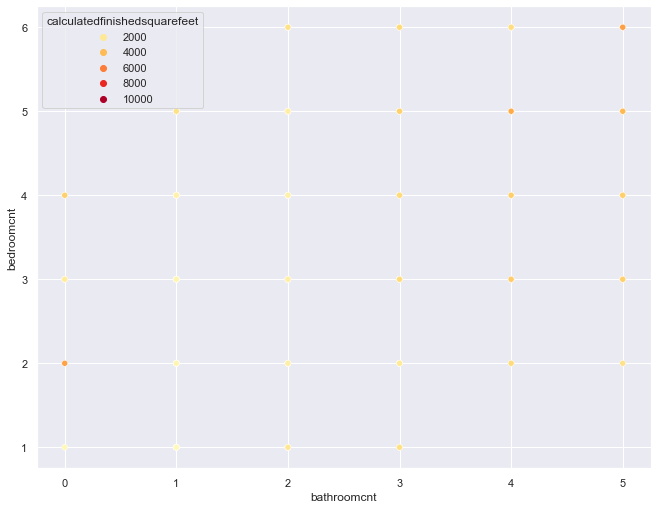

In [28]:
#Visualizing Set #1
sns.set(rc={'figure.figsize':(11,8.5)})
sns.scatterplot(data=train, x='bathroomcnt', y='bedroomcnt', hue='calculatedfinishedsquarefeet', palette='YlOrRd')
plt.show()

In [29]:
df.T

,0,1,2,3,4,5,6,8,9,11,...,52430,52431,52432,52433,52434,52435,52436,52438,52439,52440
propertylandusetypeid,261,261,261,261,261,261,261,261,261,261,...,261,261,261,261,261,261,261,261,261,261
bathroomcnt,4,2,2,2,2,4,3,5,4,2,...,2,2,3,2,1,2,2,2,2,2
bedroomcnt,4,3,3,3,2,3,3,4,4,2,...,3,4,3,3,2,3,4,4,3,3
calculatedfinishedsquarefeet,2961,1572,1540,1470,1533,2268,2220,4226,3736,1958,...,1450,2654,1811,1490,875,1108,1428,2134,1421,1516
fips,6037,6037,6037,6037,6037,6037,6037,6037,6037,6037,...,6037,6037,6037,6037,6037,6059,6037,6037,6037,6037
latitude,34193355,33726742,33797217,33801082,34109199,34071865,34183056,34061790,34056272,34174181,...,34018952,34111830,34018382,33848866,33851777,33836212,34587720,33867911,33887341,34679920
longitude,-118307273,-118301532,-118314255,-118312214,-118383568,-118460634,-118526686,-118434323,-118470259,-118363078,...,-117847237,-118322470,-117844834,-118153492,-118149827,-118007520,-117836227,-118087681,-118287434,-118151712
lotsizesquarefeet,8127,5000,5555,7287,3124,7371,6517,6981,13100,6162,...,7355,4100,10896,5102,4999,6660,29492,5041,5557,6589
propertycountylandusecode,0101,0104,0100,0100,0100,0100,0100,0104,0101,0100,...,0100,0100,0100,0100,0100,122,0100,0100,0100,0100
regionidcity,396054,12447,53027,53027,12447,12447,12447,12447,12447,12447,...,34636,12447,34636,12292,12292,10608,40227,30267,12447,5534


In [30]:
df2 = wrangle.get_zillow_data()

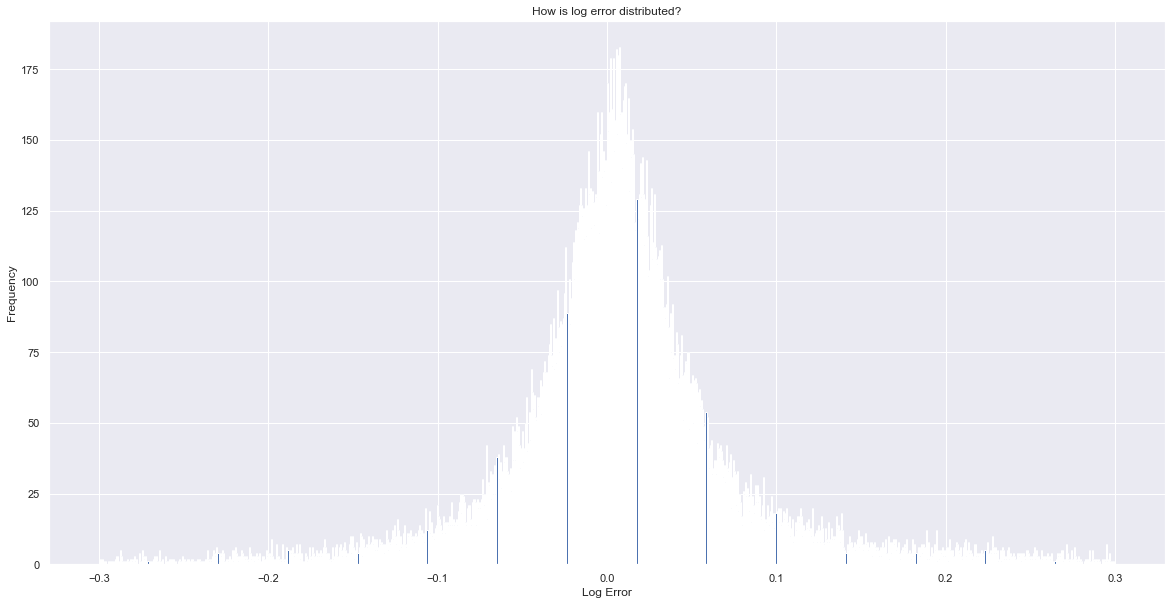

In [32]:
plt.figure(figsize=(20,10))
plt.hist(train.logerror, bins=1000)
plt.xlabel('Log Error')
plt.ylabel('Frequency')
plt.title('How is log error distributed?')
plt.show()

In [33]:
train.groupby('county').logerror.describe()

,count,mean,std,min,25%,50%,75%,max
county,,,,,,,,
LA,"16,503.00",0.01,0.08,-0.30,-0.03,0.00,0.04,0.30
Orange,"7,235.00",0.01,0.06,-0.30,-0.02,0.01,0.03,0.30
Ventura,"2,288.00",0.01,0.06,-0.29,-0.02,0.01,0.03,0.30


In [34]:
alpha = 0.05
F, p = stats.f_oneway(train.logerror[train.county == 'LA'], train.logerror[train.county == 'Orange'], train.logerror[train.county == 'Ventura'])
F, p

(12.350793385182836, 4.351737907478078e-06)

In [35]:
alpha = 0.05
H, p = stats.kruskal(train.logerror[train.county == 'LA'], train.logerror[train.county == 'Orange'], train.logerror[train.county == 'Ventura'])
H, p

(34.15811814394361, 3.825241765625664e-08)

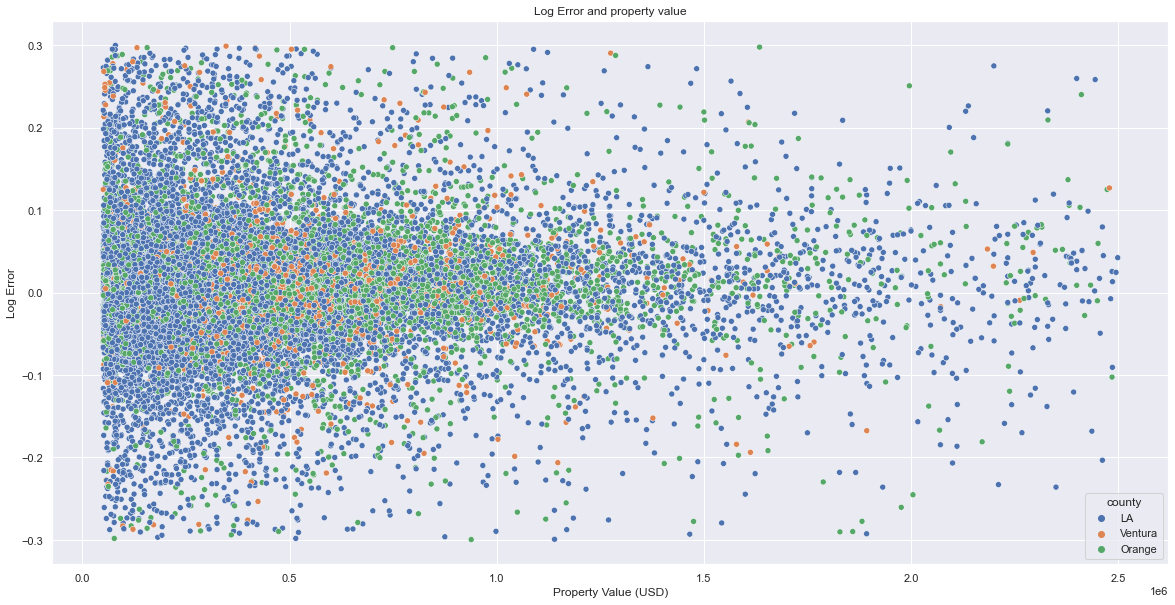

In [40]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=train, x=train.taxvaluedollarcnt, y= train.logerror, hue = train.county)
plt.title('Log Error and property value')
plt.xlabel('Property Value (USD)')
plt.ylabel('Log Error')
plt.show()

In [58]:
X = train[['taxvaluedollarcnt' , 'logerror']]

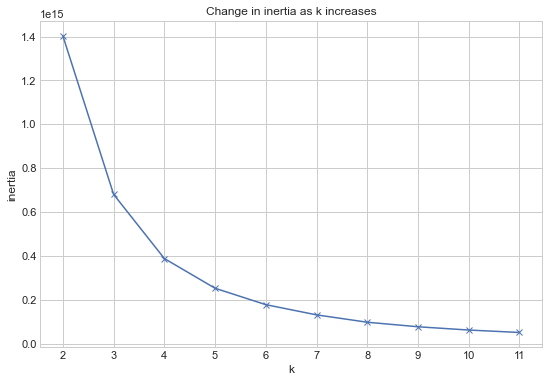

In [59]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')


In [60]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)

kmeans.predict(X)

array([2, 2, 0, ..., 2, 2, 0], dtype=int32)

In [61]:
train['cluster'] = kmeans.predict(X)

In [62]:
kmeans.cluster_centers_

array([[1.90770025e+05, 7.79201434e-03],
       [9.45420078e+05, 1.16529577e-02],
       [5.00734216e+05, 5.18651581e-03],
       [1.75799644e+06, 1.08298123e-02]])

In [63]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,taxvaluedollarcnt,logerror
0,"190,770.02",0.01
1,"945,420.08",0.01
2,"500,734.22",0.01
3,"1,757,996.44",0.01


Text(0.5, 1.0, 'log vs value')

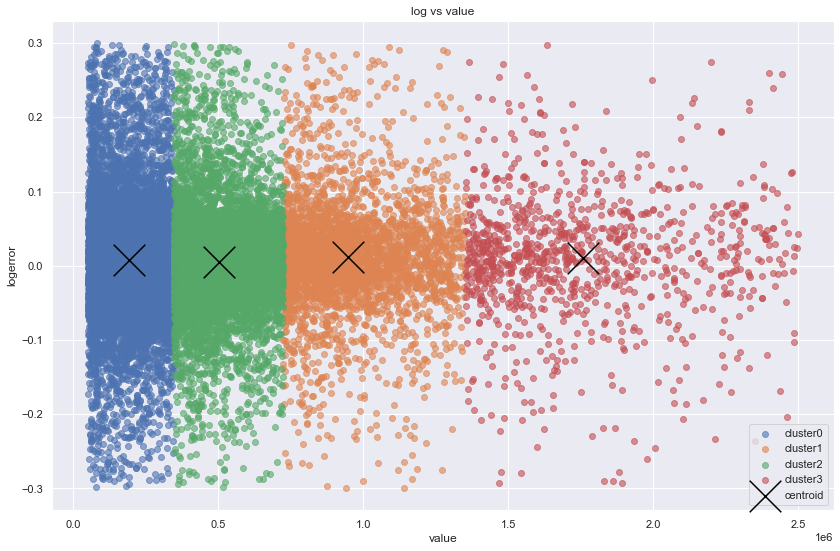

In [64]:
plt.figure(figsize = (14,9))

for cluster, subset in train.groupby('cluster'):
    plt.scatter(subset.taxvaluedollarcnt, subset.logerror, label = 'cluster' + str(cluster) , alpha = .6)
    
centroids.plot.scatter(y = 'logerror' , x = 'taxvaluedollarcnt' , c = 'black' , marker = 'x', s = 1000, ax = plt.gca(), label = 'centroid')
plt.legend()
plt.xlabel('value')
plt.ylabel('logerror')
plt.title('log vs value')